In [1]:
# Importing correct packages
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

In [2]:
# Reading Dataset
df = pd.read_csv("/Users/matthewbuttlerives/Desktop/Data Folder/readyformodel_V2.1.Final.csv")

### Note: I change the data processing file to include # of Won Faceoffs as that is how it is reported in SportsRadar. PercentageofFaceoffWin covers entire game and has Data Leakage problems.

In [3]:
df.head()

,won,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,Shots,Goals,Takeaways,Hits,Blocked Shots,Giveaways,Missed Shots,Penalities,#Won Faceoffs,timeOnIce,evenTimeOnIce,shortHandedTimeOnIce,powerPlayTimeOnIce,HoA_away,HoA_home,settled_in_OT,settled_in_REG,settled_in_tbc,startRinkSide_left,startRinkSide_right,goalie_replacement_No,goalie_replacement_Yes
0,0,2.00,1.33,0.67,50.9,8.0,0.0,1.0,14.0,3.0,6.0,4.0,1.0,10.0,330.28,280.46,18.52,31.30,1,0,0,1,0,1,0,0,1
1,1,2.67,1.00,0.67,49.1,8.0,3.0,3.0,5.0,3.0,7.0,0.0,1.0,12.0,327.11,278.93,25.04,23.15,0,1,0,1,0,1,0,1,0
2,1,2.00,1.00,0.33,43.8,11.0,0.0,0.0,4.0,6.0,2.0,6.0,1.0,11.0,334.07,293.20,9.48,31.39,1,0,1,0,0,0,1,1,0
3,0,2.67,0.67,0.33,56.2,12.0,1.0,2.0,4.0,8.0,0.0,3.0,3.0,9.0,333.07,296.11,25.11,11.85,0,1,1,0,0,0,1,1,0
4,1,3.00,1.00,0.33,45.7,9.0,0.0,3.0,4.0,7.0,7.0,3.0,2.0,7.0,328.89,281.57,17.78,29.54,1,0,0,1,0,1,0,1,0


In [4]:
df.shape

(51558, 27)

In [5]:
# Removing dirty observations, GIGO (Garbage IN - Garbage OUT)
df = df[:-9611]

In [6]:
df.shape

(41947, 27)

In [7]:
# Removing more garbage observations
df.drop(df.index[18001:40883],0,inplace=True)

/var/folders/dq/3qj0hnk53pb8rjp2l_k7zby80000gn/T/ipykernel_42803/3154288444.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df.drop(df.index[18001:40883],0,inplace=True)


In [8]:
df.shape

(19065, 27)

# XGBoost Model

In [9]:
# XGBoost Attempt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [10]:
# split data into X and y
y = df.pop('won')
X = df

In [11]:
# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [12]:
# fit model on training data
model = XGBClassifier()
model.fit(X_train, y_train)

/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:09:49] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [13]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [14]:
# evaluate predictions
from sklearn.metrics import precision_score, recall_score
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print('Precision score: ', precision_score(y_test, predictions))
print('Recall score: ', recall_score(y_test, predictions))

Accuracy: 73.11%
Precision score:  0.7368948247078464
Recall score:  0.7094181935069109


[0.03760758 0.01352795 0.06824441 0.0173489  0.01462442 0.1409755
 0.01657804 0.01608455 0.01700527 0.01700509 0.01597512 0.01635294
 0.01715341 0.05702267 0.01921163 0.03494208 0.01792803 0.02634168
 0.         0.06590309 0.05184928 0.10588111 0.0149514  0.
 0.19748586 0.        ]


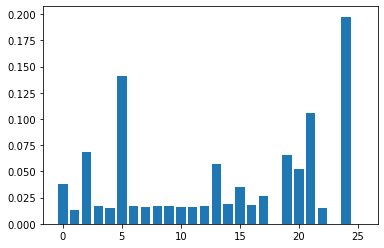

In [15]:
# feature importance
# plot feature importance manually
from matplotlib import pyplot
print(model.feature_importances_)
# plot
pyplot.bar(range(len(model.feature_importances_)), model.feature_importances_)
pyplot.show()

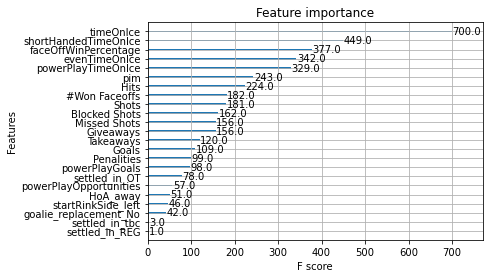

In [16]:
# plot feature importance
from xgboost import plot_importance
plot_importance(model)
pyplot.show()

# XGBoost Model Without Time

In [17]:
# Drop Time
df = pd.read_csv("/Users/matthewbuttlerives/Desktop/Data Folder/readyformodel_V2.1.Final.csv")
df = df[:-9611]
df.drop(df.index[18001:40883],0,inplace=True)
df = df.reset_index(drop=True)
df = df.drop(columns = ['powerPlayOpportunities','settled_in_tbc','powerPlayGoals','timeOnIce',"shortHandedTimeOnIce","evenTimeOnIce","faceOffWinPercentage","pim","powerPlayTimeOnIce","settled_in_OT","settled_in_REG","goalie_replacement_No","goalie_replacement_Yes"],axis = 1)

/var/folders/dq/3qj0hnk53pb8rjp2l_k7zby80000gn/T/ipykernel_42803/689431014.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df.drop(df.index[18001:40883],0,inplace=True)


In [18]:
print(df.shape)
df.head()

(19065, 14)


,won,Shots,Goals,Takeaways,Hits,Blocked Shots,Giveaways,Missed Shots,Penalities,#Won Faceoffs,HoA_away,HoA_home,startRinkSide_left,startRinkSide_right
0,0,8.0,0.0,1.0,14.0,3.0,6.0,4.0,1.0,10.0,1,0,1,0
1,1,8.0,3.0,3.0,5.0,3.0,7.0,0.0,1.0,12.0,0,1,1,0
2,1,11.0,0.0,0.0,4.0,6.0,2.0,6.0,1.0,11.0,1,0,0,1
3,0,12.0,1.0,2.0,4.0,8.0,0.0,3.0,3.0,9.0,0,1,0,1
4,1,9.0,0.0,3.0,4.0,7.0,7.0,3.0,2.0,7.0,1,0,1,0


In [19]:
# split data into X and y
y = df.pop('won')
X = df

In [20]:
# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [21]:
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)

/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:09:50] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [22]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [23]:
# evaluate predictions
from sklearn.metrics import precision_score, recall_score
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print('Precision score: ', (precision_score(y_test, predictions)))
print('Recall score: ', recall_score(y_test, predictions))

Accuracy: 59.27%
Precision score:  0.5953375086986779
Recall score:  0.5499839279974285


In [24]:
# Far more realistic results.

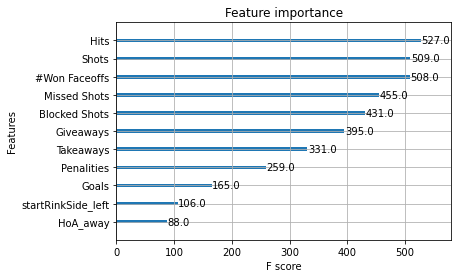

In [25]:
# plot feature importance
from xgboost import plot_importance
plot_importance(model)
pyplot.show()

In [26]:
df.head()

,Shots,Goals,Takeaways,Hits,Blocked Shots,Giveaways,Missed Shots,Penalities,#Won Faceoffs,HoA_away,HoA_home,startRinkSide_left,startRinkSide_right
0,8.0,0.0,1.0,14.0,3.0,6.0,4.0,1.0,10.0,1,0,1,0
1,8.0,3.0,3.0,5.0,3.0,7.0,0.0,1.0,12.0,0,1,1,0
2,11.0,0.0,0.0,4.0,6.0,2.0,6.0,1.0,11.0,1,0,0,1
3,12.0,1.0,2.0,4.0,8.0,0.0,3.0,3.0,9.0,0,1,0,1
4,9.0,0.0,3.0,4.0,7.0,7.0,3.0,2.0,7.0,1,0,1,0


### XGBoost model probability and predicitions

In [27]:
# make predictions for tonight data
def tonight_bet(shots,goals,takeaways,hits,blockedShots,giveaways,missedShots,penalties,Won_Faceoffs,hoa_away,hoa_home,startRinkSide_Left,startRinkSide_Right):
    bet_df = pd.DataFrame({"shots": [shots],"goals": [goals],"takeaways": [takeaways],"hits": [hits]
                       ,"blockedShots": [blockedShots],"giveaways": [giveaways],"missedShots": [missedShots]
                       ,"penalties": [penalties],"#Won Faceoffs": [Won_Faceoffs],"hoa_away": [hoa_away],"hoa_home": [hoa_home],"startRinkSide_left": [startRinkSide_Left],
                       "startRinkSide_right": [startRinkSide_Right],},index=[0,1,2,3,4,5,6,7,8,9,10,11,12],)
    bet_df = bet_df.iloc[:1 , :]
    tonights_team = bet_df
    return tonights_team

In [28]:
tonight_bet(4,2,2,4,2,3,2,1,2,0,1,0,1)

,shots,goals,takeaways,hits,blockedShots,giveaways,missedShots,penalties,#Won Faceoffs,hoa_away,hoa_home,startRinkSide_left,startRinkSide_right
0,4,2,2,4,2,3,2,1,2,0,1,0,1


In [29]:
# make predictions for test data
X_test = tonight_bet(4,2,2,4,2,3,2,1,2,0,1,0,1)
# store value to use in model

y_pred = model.predict(X_test)
prediction = [round(value) for value in y_pred]
print(prediction)
probability = model.predict_proba(X_test)
print(probability)

[1]
[[0.0489679 0.9510321]]


# Light Gradient Boosting (LGBM)

In [30]:
# Machine Learning Libraries
import lightgbm as lgb
from sklearn import metrics

# Figures
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

In [31]:
# No null values
df = pd.read_csv("/Users/matthewbuttlerives/Desktop/Data Folder/readyformodel_V2.1.Final.csv")
df = df[:-9611]
df.drop(df.index[18001:40883],0,inplace=True)
df = df.reset_index(drop=True)
df = df.drop(columns = ['powerPlayOpportunities','settled_in_tbc','powerPlayGoals','timeOnIce',"shortHandedTimeOnIce","evenTimeOnIce","faceOffWinPercentage","pim","powerPlayTimeOnIce","settled_in_OT","settled_in_REG","goalie_replacement_No","goalie_replacement_Yes"],axis = 1)
df.isna().sum()

/var/folders/dq/3qj0hnk53pb8rjp2l_k7zby80000gn/T/ipykernel_42803/510440310.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df.drop(df.index[18001:40883],0,inplace=True)


won                    0
Shots                  0
Goals                  0
Takeaways              0
Hits                   0
Blocked Shots          0
Giveaways              0
Missed Shots           0
Penalities             0
#Won Faceoffs          0
HoA_away               0
HoA_home               0
startRinkSide_left     0
startRinkSide_right    0
dtype: int64

In [32]:
# split data into X and y
y = df.pop('won')
X = df
# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [33]:
model = lgb.LGBMClassifier(learning_rate=0.09,max_depth=-5,random_state=42)
model.fit(X_train,y_train,eval_set=[(X_test,y_test),(X_train,y_train)],
          verbose=20,eval_metric='logloss')

/opt/anaconda3/lib/python3.8/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's binary_logloss: 0.627699	valid_0's binary_logloss: 0.653864
[40]	training's binary_logloss: 0.611205	valid_0's binary_logloss: 0.655969
[60]	training's binary_logloss: 0.597606	valid_0's binary_logloss: 0.657703
[80]	training's binary_logloss: 0.585199	valid_0's binary_logloss: 0.659674
[100]	training's binary_logloss: 0.573384	valid_0's binary_logloss: 0.661491


LGBMClassifier(learning_rate=0.09, max_depth=-5, random_state=42)

In [34]:
print('Training accuracy {:.4f}'.format(model.score(X_train,y_train)))
print('Testing accuracy {:.4f}'.format(model.score(X_test,y_test)))

Training accuracy 0.7027
Testing accuracy 0.6098


In [35]:
# Interestingly, slightly better accuracy
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print('Precision score: ', (precision_score(y_test, predictions)))
print('Recall score: ', recall_score(y_test, predictions))

Accuracy: 60.98%
Precision score:  0.6186685962373372
Recall score:  0.549662487945998


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

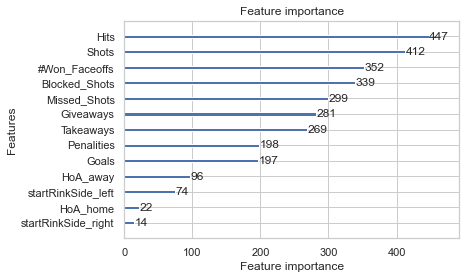

In [36]:
lgb.plot_importance(model)

<AxesSubplot:title={'center':'Metric during training'}, xlabel='Iterations', ylabel='binary_logloss'>

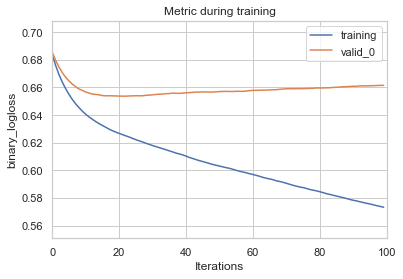

In [37]:
lgb.plot_metric(model)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


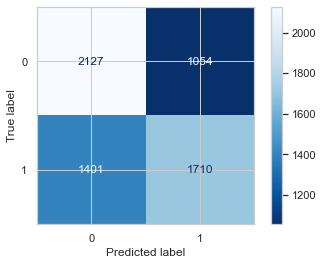

In [38]:
metrics.plot_confusion_matrix(model,X_test,y_test,cmap='Blues_r')

In [39]:
print(metrics.classification_report(y_test,model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.60      0.67      0.63      3181
           1       0.62      0.55      0.58      3111

    accuracy                           0.61      6292
   macro avg       0.61      0.61      0.61      6292
weighted avg       0.61      0.61      0.61      6292



In [40]:
tonight_bet(14,3,2,14,12,9,7,1,7,0,1,0,1)

,shots,goals,takeaways,hits,blockedShots,giveaways,missedShots,penalties,#Won Faceoffs,hoa_away,hoa_home,startRinkSide_left,startRinkSide_right
0,14,3,2,14,12,9,7,1,7,0,1,0,1


In [41]:
# make predictions for test data
X_Game_test = tonight_bet(14,3,2,14,12,9,7,1,7,0,1,0,1)
# store value to use in model

Game_y_pred = model.predict(X_Game_test)
prediction = [round(value) for value in Game_y_pred]
print(prediction)
probability = model.predict_proba(X_Game_test)
print(probability)

[1]
[[0.21606898 0.78393102]]


# Test API Sports Radar Request

In [1]:
#import requests
# Get API info
#response = requests.get("http://api.sportradar.us/nhl/trial/v7/en/games/54e4af92-1719-4d06-aa15-5a79098e06ce/analytics.json?api_key=sa8b3wuwy549qwy6jw6srsgv")

#import json

# Define function that translates API into text
#def jprint(obj):
#    text = json.dumps(obj, sort_keys=True, indent=4)
#    print(text)
#    return ""

# Set response as json
# x = response.json()

# Print API info
# jprint(x)


In [43]:
# Could explore using python sportsradar application
# !pip install sportradar

In [44]:
# Exporting current Dataset as Revised Dataset

from pathlib import Path  
filepath = Path('/Users/matthewbuttlerives/Desktop/Data Folder/readyformodel_V2.1.Final.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
df.to_csv('/Users/matthewbuttlerives/Desktop/Data Folder/Revised_Final_Dataset.csv')  